In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

## read data

In [2]:
data_path = 'data/joke_data/'
train = scipy.io.loadmat(data_path + 'joke_train.mat')
train = train['train']

In [3]:
file = open(data_path + 'validation.txt')
data = file.read()
data = data.split('\n')
validation = []
for i in data[:-1]:
    ii = list(map(int, i.split(',')))
    validation.append(ii)
validation = np.array(validation)
print(validation.shape)

(3690, 3)


In [4]:
file = open(data_path + 'query.txt')
data = file.read()
data = data.split('\n')
query = []
for i in data[:-1]:
    ii = list(map(int, i.split(',')))
    query.append(ii)
query = np.array(query)
query.shape

(902409, 3)

## Latent factor model

In [5]:
def evaluate_zf_MSE(R, d):
    Rzf = np.nan_to_num(R)
    u, s, v = np.linalg.svd(Rzf, full_matrices=0)
    users = np.multiply(u[:, :d], np.sqrt(s[:d]))
    items = np.multiply(v[:d, :].T, np.sqrt(s[:d])).T
    Rapprox = users.dot(items)
    diff = np.square(Rapprox - Rzf)
    idx = np.logical_not(np.isnan(R))
    MSE = np.sum(diff[idx]) / np.sum(idx)
    return users, items, MSE
    

In [6]:
def validation_accuracy(users, items, validation):
    N = len(validation)
    Ncorrect = 0
    for i in validation:
        predict = users[i[0]-1, :].dot(items[:, i[1]-1])
        if predict * (i[2]-0.5) > 0:
            Ncorrect += 1
    return Ncorrect/float(N)

d=2, validation accuracy=0.705149
d=5, validation accuracy=0.715447
d=10, validation accuracy=0.716531
d=20, validation accuracy=0.685908


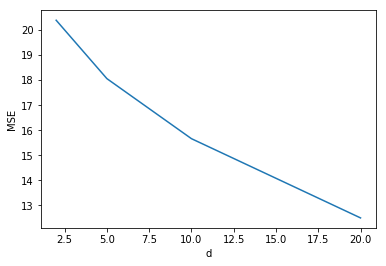

In [7]:
all_d = [2, 5, 10, 20]
MSE = np.zeros(len(all_d))
for i, d in enumerate(all_d):
    users, items, MSE[i] = evaluate_zf_MSE(train, d)
    print('d=%d, validation accuracy=%f' % (d, validation_accuracy(users, items, validation)))
plt.plot(all_d, MSE)
plt.xlabel('d')
plt.ylabel('MSE')
plt.show()

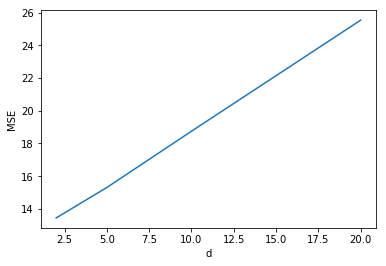

In [8]:
# plot for (b)
plt.plot([2, 5, 10, 20], [13.4490305364077, 15.3115781030497, 18.7490313967159, 25.5368811320869])
plt.xlabel('d')
plt.ylabel('MSE')
plt.show()